In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [85]:
df = pd.read_csv("AB_NYC_2019.csv")

In [86]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,10/19/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,5/21/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,7/5/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,11/19/2018,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [87]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

- A lot of missing data present in the dataset

In [88]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [89]:
df.duplicated().sum()

0

- So no duplicate rows present in the dataset

# Handle Missing Values

In [90]:
df['last_review']

0        10/19/2018
1         5/21/2019
2               NaN
3          7/5/2019
4        11/19/2018
            ...    
48890           NaN
48891           NaN
48892           NaN
48893           NaN
48894           NaN
Name: last_review, Length: 48895, dtype: object

In [91]:
df['reviews_per_month']

0        0.21
1        0.38
2         NaN
3        4.64
4        0.10
         ... 
48890     NaN
48891     NaN
48892     NaN
48893     NaN
48894     NaN
Name: reviews_per_month, Length: 48895, dtype: float64

In [92]:
df['last_review'].nunique()

1764

- The last_review column has a total of 1764 unique date values
- To fill the missing dates, we need to impute them
- We will impute them using the most common date or median dates

In [93]:
df['last_review'] = pd.to_datetime(df['last_review'])  
most_common_date = df['last_review'].mode()[0]  
df['last_review'].fillna(most_common_date, inplace=True)
df['last_review']

C:\Users\Rafid Mahmud\AppData\Local\Temp\ipykernel_5568\969937755.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['last_review'].fillna(most_common_date, inplace=True)


0       2018-10-19
1       2019-05-21
2       2019-06-23
3       2019-07-05
4       2018-11-19
           ...    
48890   2019-06-23
48891   2019-06-23
48892   2019-06-23
48893   2019-06-23
48894   2019-06-23
Name: last_review, Length: 48895, dtype: datetime64[ns]

In [94]:
df['name'].isnull().sum()

16

- Only 16 names are missing out of 48895 data
- So we can easily drop it
- Same goes for host name as well

In [95]:
df.dropna(subset=['name'], inplace=True)

In [96]:
df.dropna(subset=['host_name'], inplace=True)

In [97]:
df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                           0
reviews_per_month                 10037
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [98]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
df['reviews_per_month'] = imp.fit_transform(df[['reviews_per_month']])

- Used the simple Imputer to fill the missing values 

In [99]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

- Now our dataset has no missing values

# Outlier detection

In [100]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
print(numeric_columns)

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')


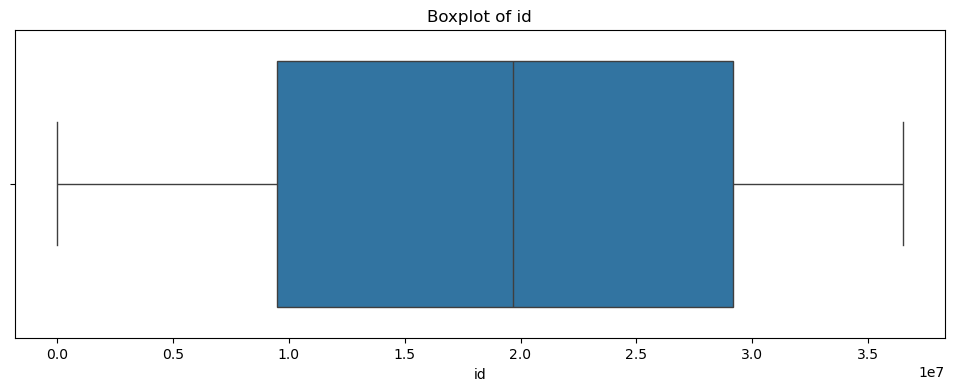

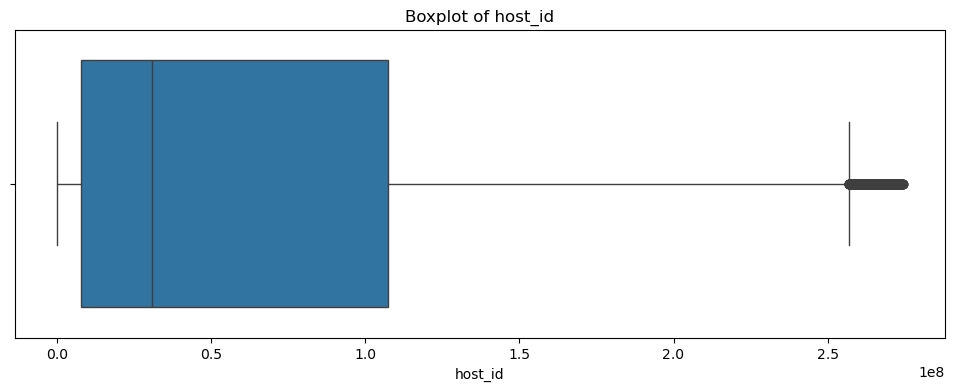

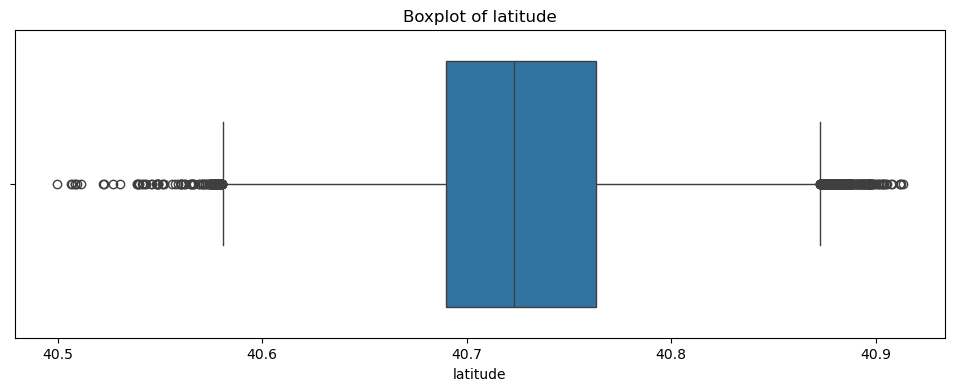

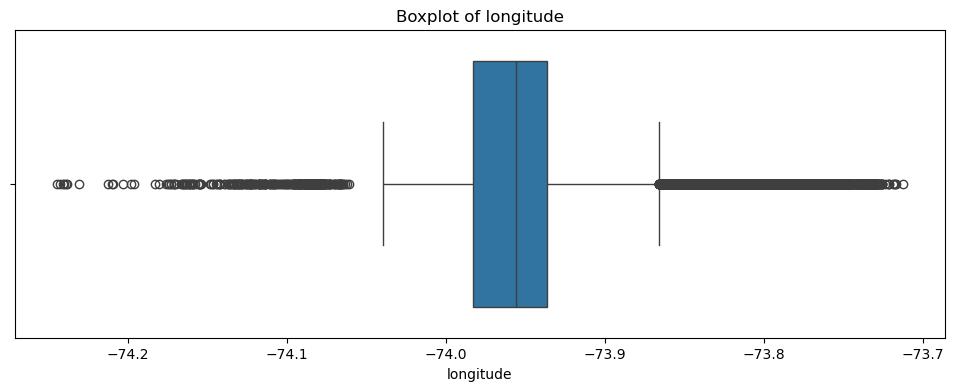

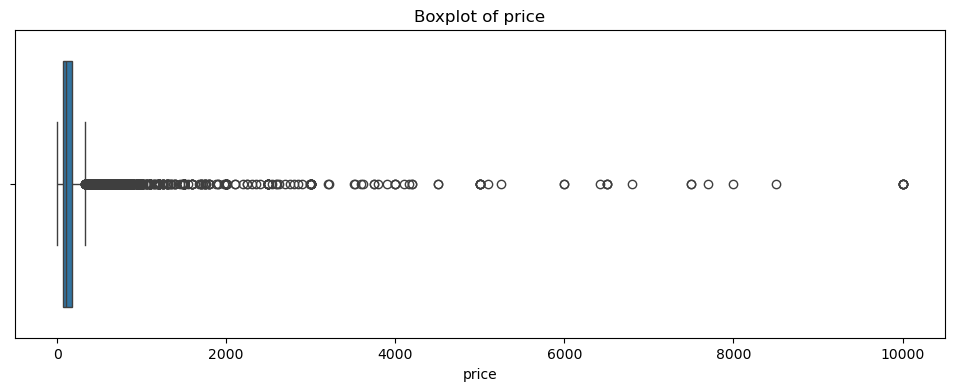

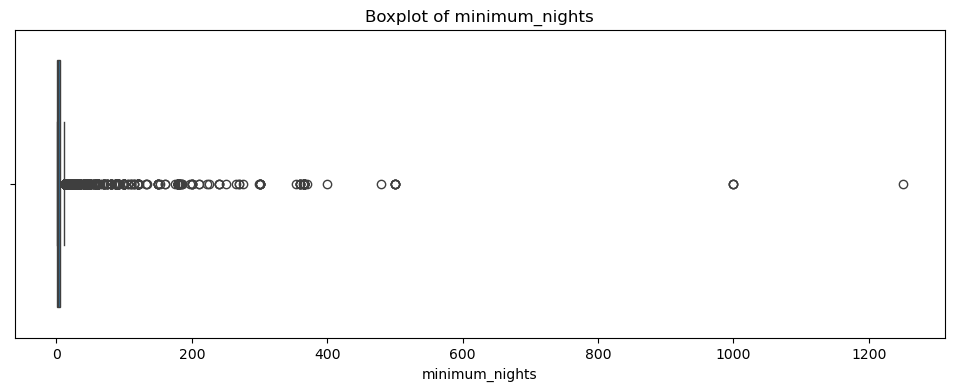

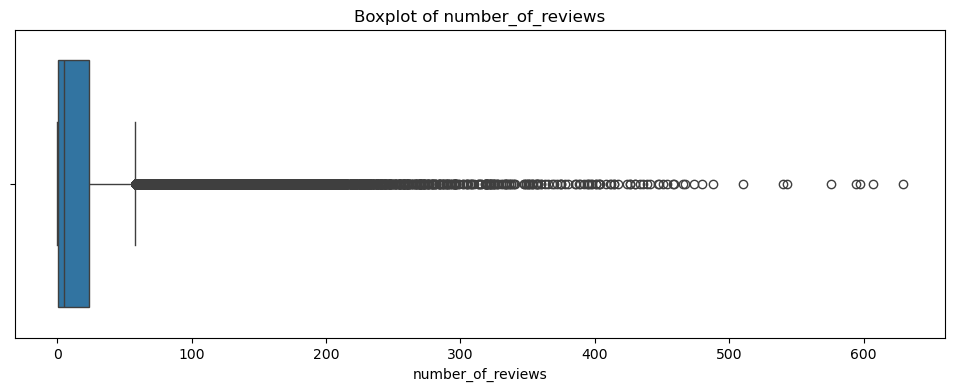

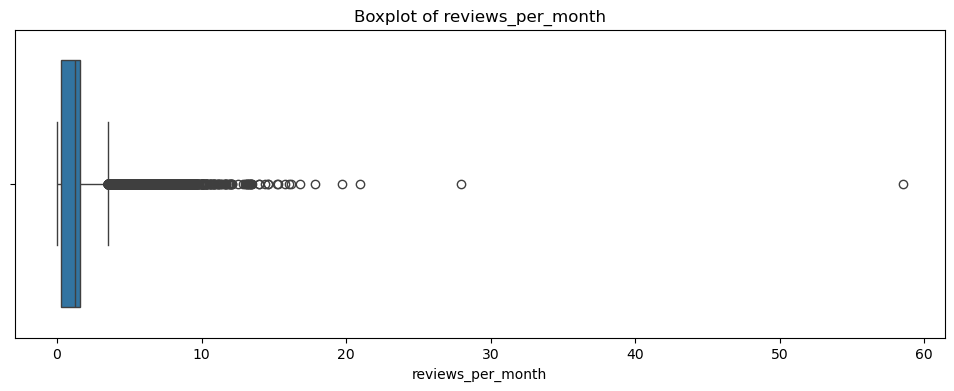

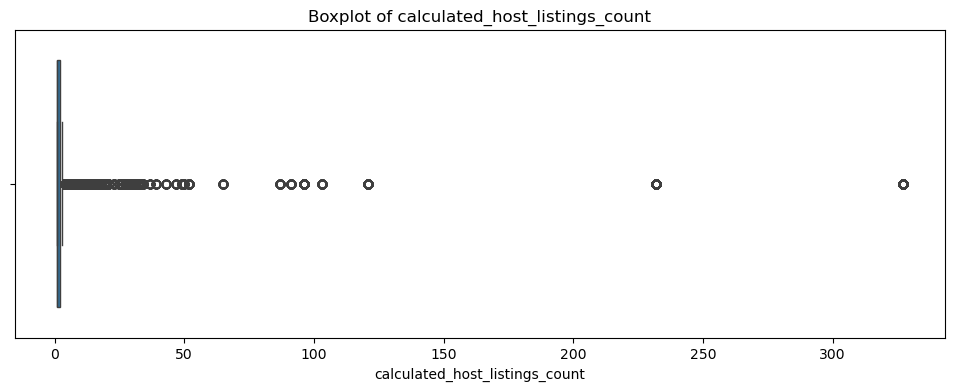

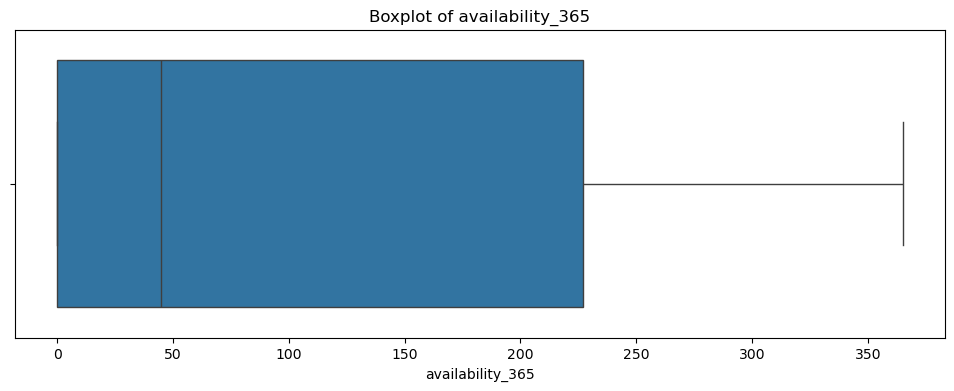

In [101]:
for column in numeric_columns:
    plt.figure(figsize=(12, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

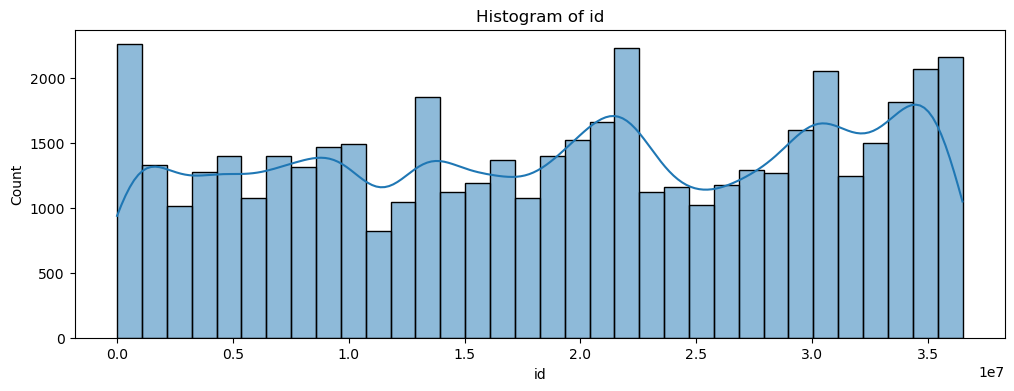

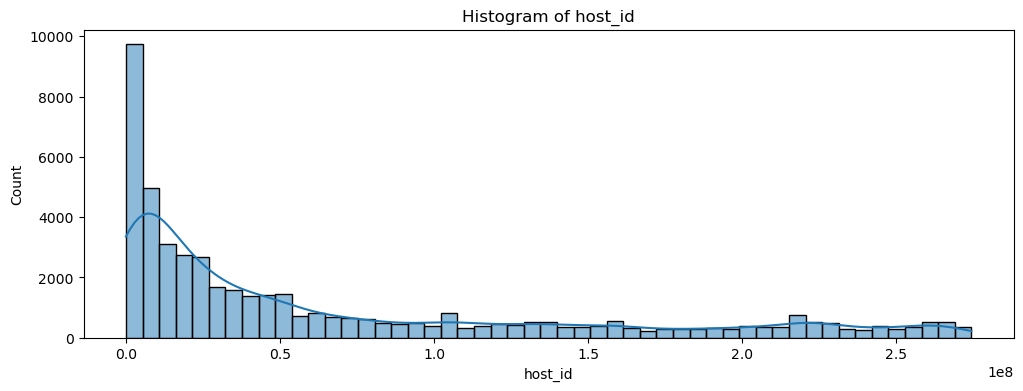

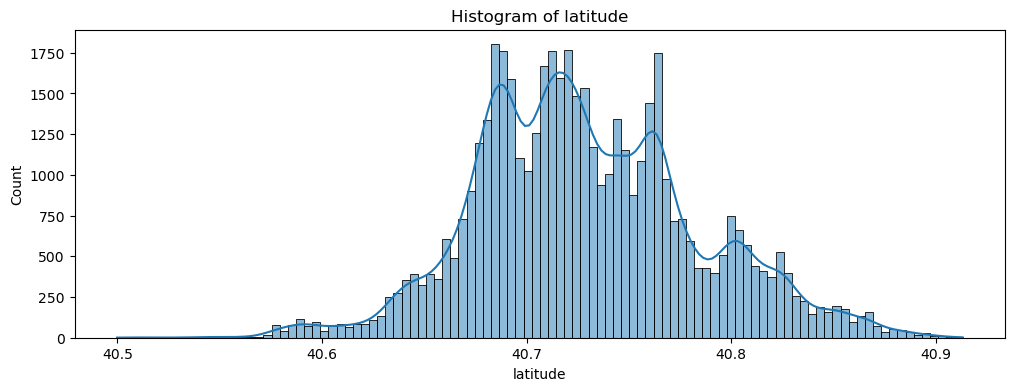

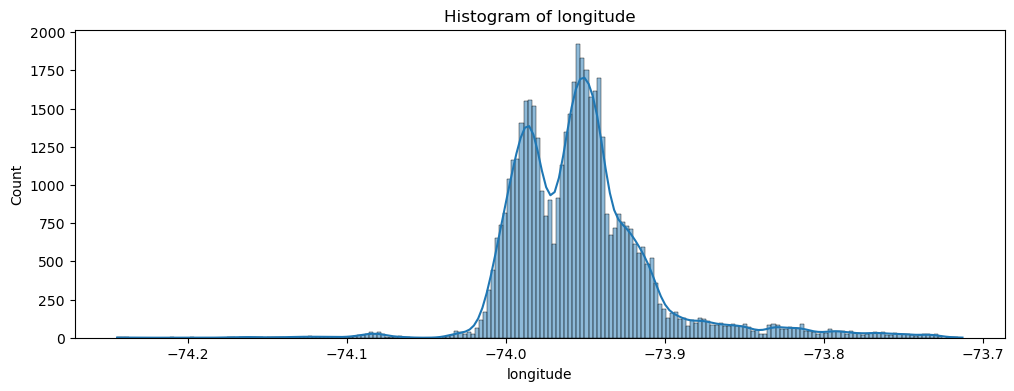

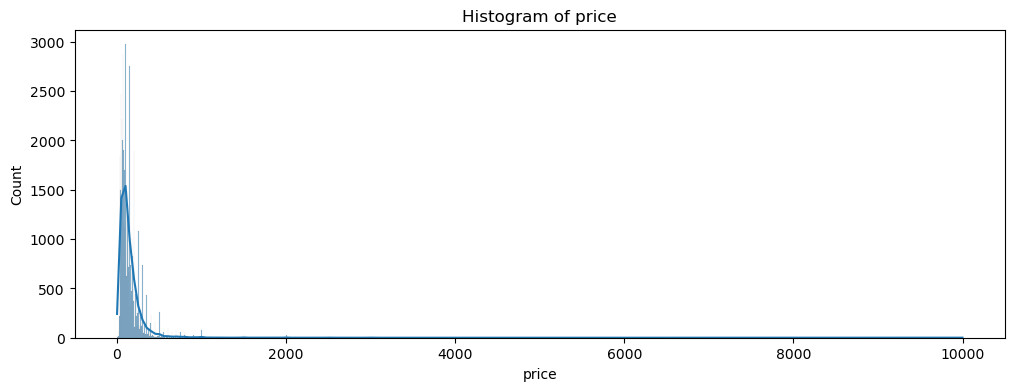

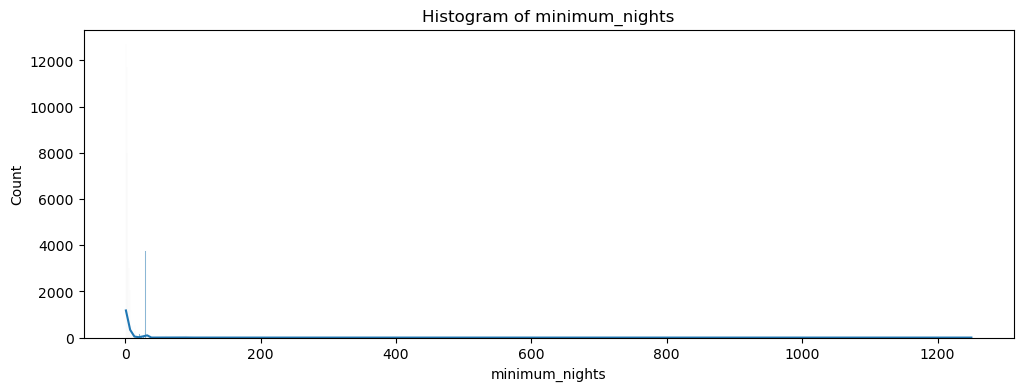

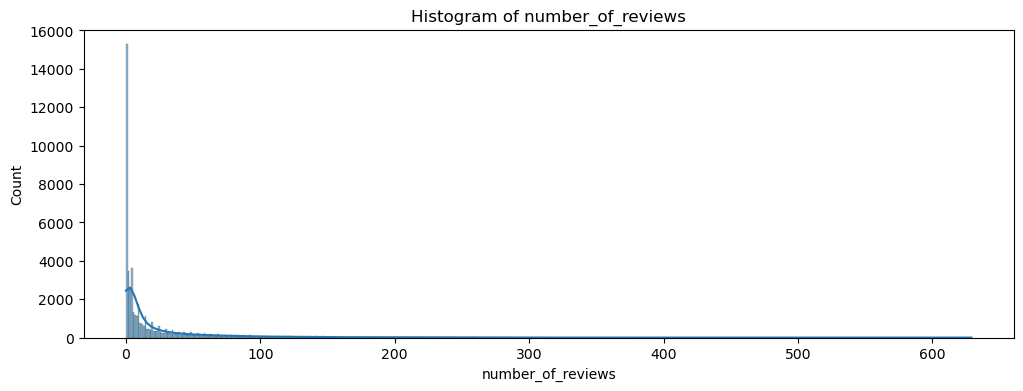

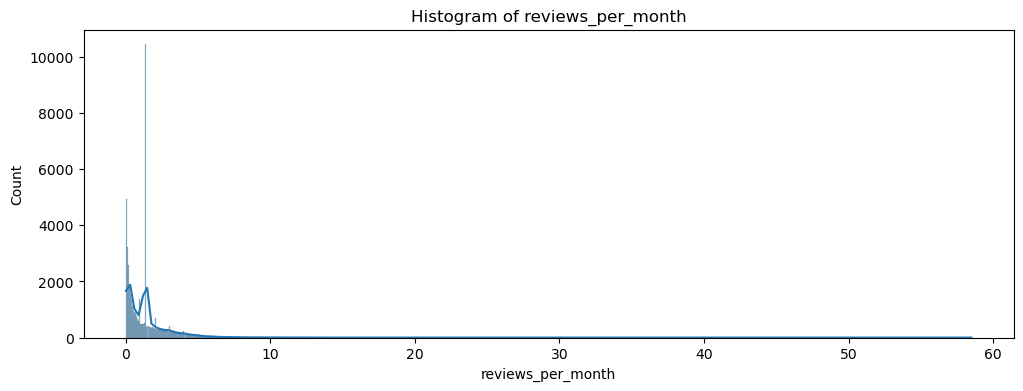

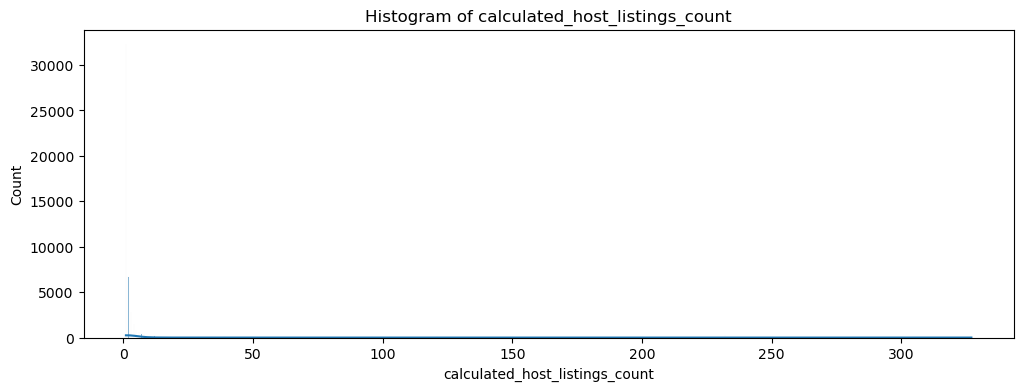

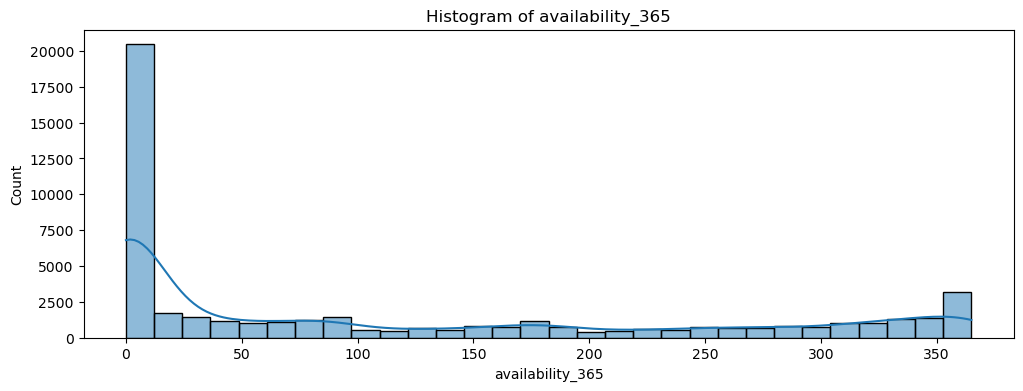

In [102]:
for column in numeric_columns:
    plt.figure(figsize=(12, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()

### Calculate Skewness

In [103]:
numerical_cols = df.select_dtypes(include=['number'])

skewness_values = numerical_cols.skew()

print("Skewness of numerical columns:\n")
print(skewness_values)

Skewness of numerical columns:

id                                -0.091088
host_id                            1.205894
latitude                           0.237075
longitude                          1.283639
price                             19.114478
minimum_nights                    20.995047
number_of_reviews                  3.691953
reviews_per_month                  3.513114
calculated_host_listings_count     7.930061
availability_365                   0.763087
dtype: float64


- We can see that the column price and minimum_nights have extreme skewness
- Means there are high chance that outliers may be present

### Remove outliers based on Interquartile range

In [104]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [105]:
df = remove_outliers(df, 'price')
df = remove_outliers(df, 'minimum_nights')

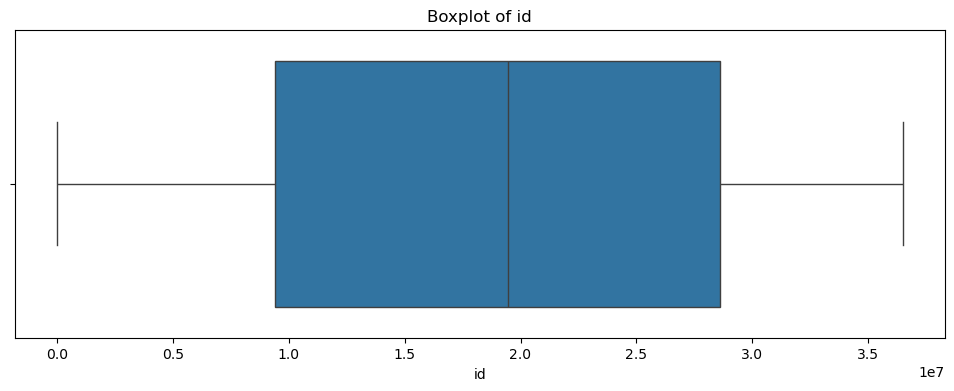

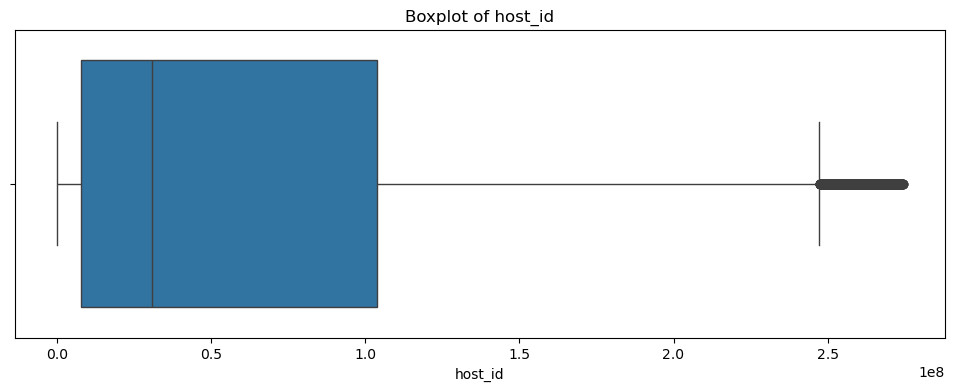

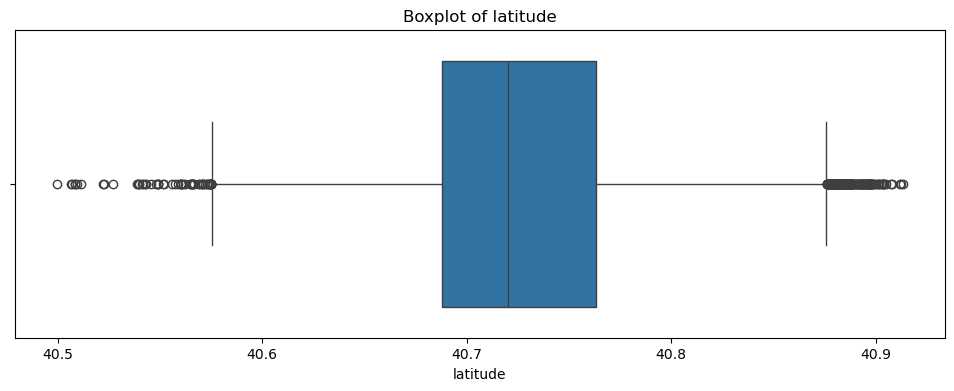

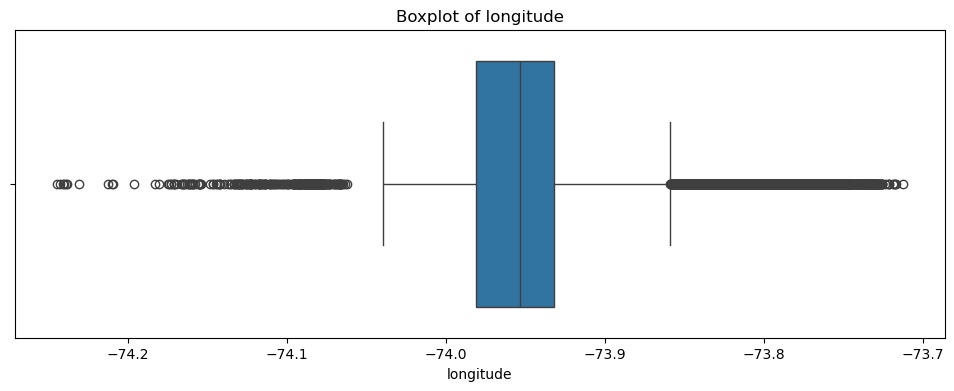

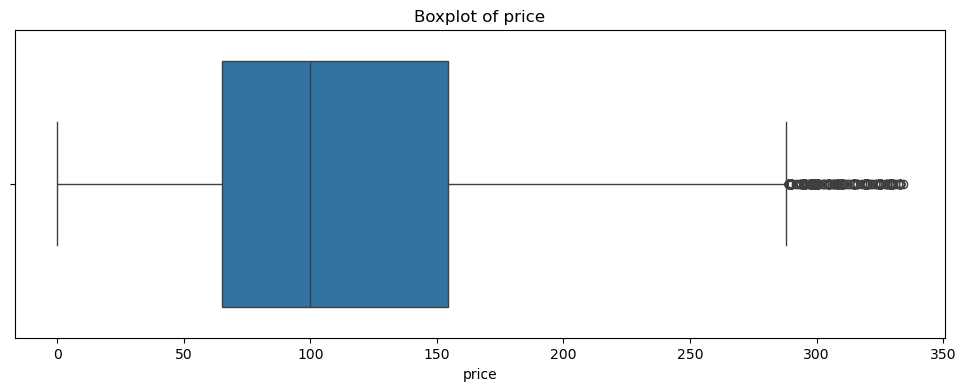

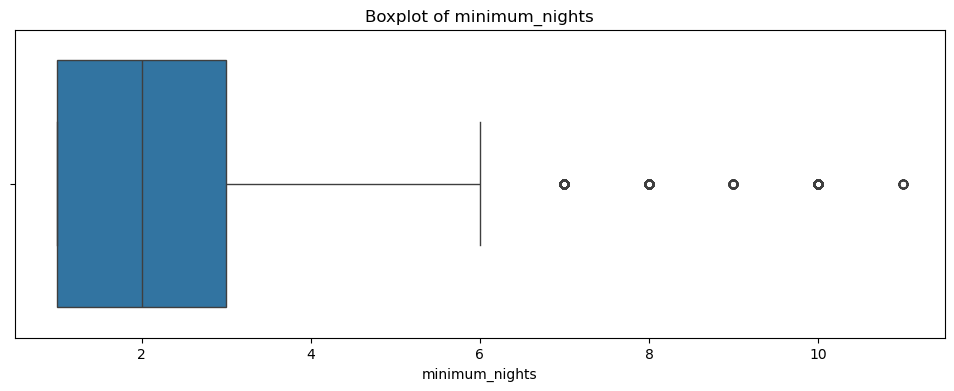

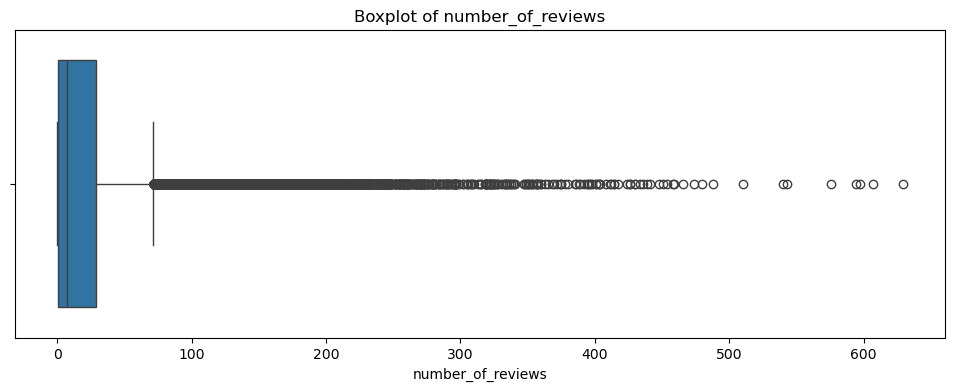

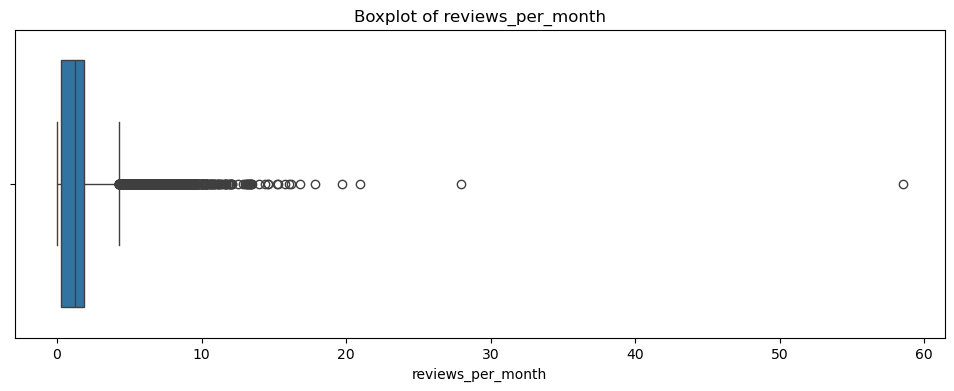

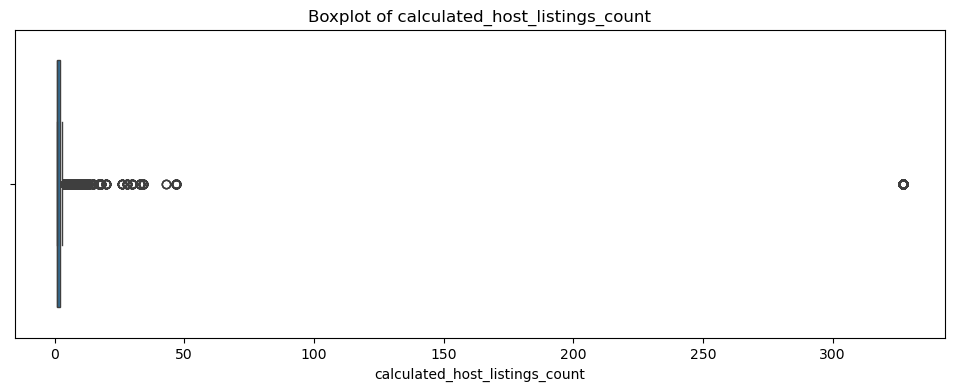

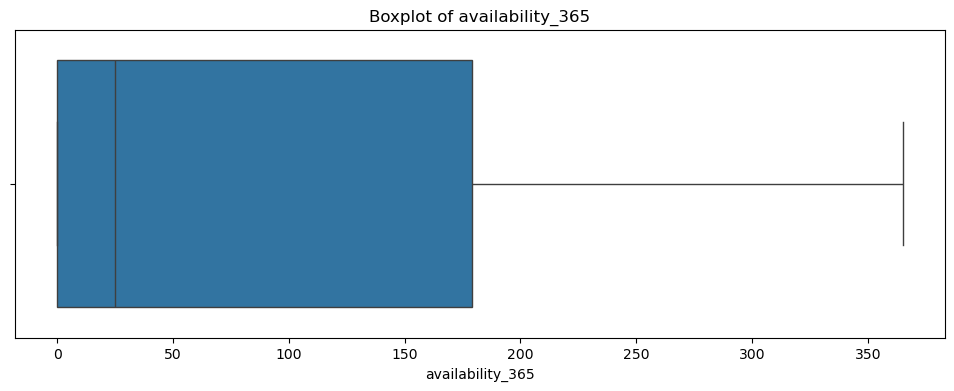

In [106]:
for column in numeric_columns:
    plt.figure(figsize=(12, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [107]:
df.shape

(39703, 16)

In [109]:
df['reviews_per_month'].max()

58.5

In [111]:
df = df[df['reviews_per_month'] <= 25]

In [112]:
df['reviews_per_month'].max()

20.94

In [115]:
df = df[df['calculated_host_listings_count'] <= 100]

In [116]:
numerical_cols = df.select_dtypes(include=['number'])

skewness_values = numerical_cols.skew()

print("Skewness of numerical columns:\n")
print(skewness_values)

Skewness of numerical columns:

id                               -0.063312
host_id                           1.267361
latitude                          0.294095
longitude                         1.212675
price                             0.972613
minimum_nights                    1.531935
number_of_reviews                 3.423614
reviews_per_month                 2.256502
calculated_host_listings_count    8.534103
availability_365                  1.008870
dtype: float64
